In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
!wget -q https://github.com/mohan696matlab/Gear-Fault-Diagnosis/Gear_Fault_data.csv

In [49]:
# charge the data 
df  = pd.read_csv('/kaggle/input/gear-data/Gear_Fault_data.csv')

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df.iloc[:,:-2]=scaler.fit_transform(df.iloc[:,:-2])

df

,a1,a2,a3,a4,load,fault
0,0.381468,0.329958,-0.421759,-0.460352,0.0,F
1,0.398126,0.317534,-0.713949,0.220273,0.0,F
2,-0.039401,-0.060712,0.199101,0.135505,0.0,F
3,0.183330,-0.202151,0.174735,0.137119,0.0,F
4,-0.210701,0.222349,-0.286385,-0.077817,0.0,F
...,...,...,...,...,...,...
2021114,0.109795,-0.733740,-0.436623,-0.703804,0.9,H
2021115,-1.717584,1.752341,-0.552190,0.575163,0.9,H
2021116,-0.655194,0.584480,0.369389,0.610819,0.9,H
2021117,0.303240,-1.154518,1.346836,-0.305877,0.9,H


In [51]:
df

,a1,a2,a3,a4,load,fault
0,0.381468,0.329958,-0.421759,-0.460352,0.0,F
1,0.398126,0.317534,-0.713949,0.220273,0.0,F
2,-0.039401,-0.060712,0.199101,0.135505,0.0,F
3,0.183330,-0.202151,0.174735,0.137119,0.0,F
4,-0.210701,0.222349,-0.286385,-0.077817,0.0,F
...,...,...,...,...,...,...
2021114,0.109795,-0.733740,-0.436623,-0.703804,0.9,H
2021115,-1.717584,1.752341,-0.552190,0.575163,0.9,H
2021116,-0.655194,0.584480,0.369389,0.610819,0.9,H
2021117,0.303240,-1.154518,1.346836,-0.305877,0.9,H


In [97]:
# sliding window ( x , y ) initialization
win_len=100
stride=200

X=[]
Y=[]


for k in ['F','H']:
    
    df_temp_1 = df[df['fault']==k]
    
    for j in (np.arange(0,1,0.1)):
        df_temp_2=df_temp_1[df_temp_1['load']==j]

        for i in np.arange(0,len(df_temp_2)-(win_len),stride):
            X.append(df_temp_2.iloc[i:i+win_len,:-1])
            Y.append(df_temp_2.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],X.shape[1],X.shape[2],1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)

encoder = LabelEncoder()
# Fit on the complete set of labels (including training and validation data if needed)
encoder.fit(['H', 'F'])  # Assuming 'H' for healthy and 'F' for faulty

encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [98]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [99]:
print(df.columns)

Index(['a1', 'a2', 'a3', 'a4', 'load', 'fault'], dtype='object')


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7138 samples in 0.003s...
[t-SNE] Computed neighbors for 7138 samples in 1.010s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7138
[t-SNE] Computed conditional probabilities for sample 2000 / 7138
[t-SNE] Computed conditional probabilities for sample 3000 / 7138
[t-SNE] Computed conditional probabilities for sample 4000 / 7138
[t-SNE] Computed conditional probabilities for sample 5000 / 7138
[t-SNE] Computed conditional probabilities for sample 6000 / 7138
[t-SNE] Computed conditional probabilities for sample 7000 / 7138
[t-SNE] Computed conditional probabilities for sample 7138 / 7138
[t-SNE] Mean sigma: 4.793280
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.628647
[t-SNE] KL divergence after 300 iterations: 3.681510


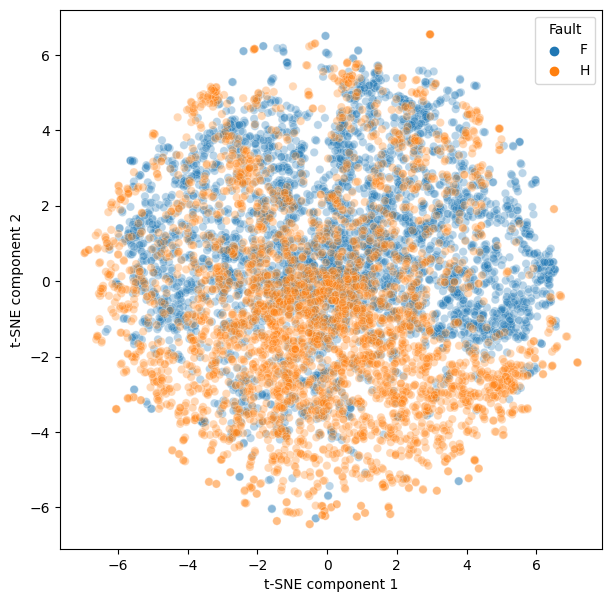

In [100]:
#T SNE technique for dimensionality reduction
X_pre_cnn = X.reshape(X.shape[0],X.shape[1]*X.shape[2])

from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(X_pre_cnn)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['t-SNE component 1', 't-SNE component 2'])

tSNEdf['Fault']=Y


# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=tSNEdf['t-SNE component 1'],y=tSNEdf['t-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4914 - loss: 0.7018 - val_accuracy: 0.4980 - val_loss: 0.6938
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4932 - loss: 0.6930 - val_accuracy: 0.4980 - val_loss: 0.6946
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4927 - loss: 0.6916 - val_accuracy: 0.4980 - val_loss: 0.6967
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4966 - loss: 0.6851 - val_accuracy: 0.4980 - val_loss: 0.6977
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4928 - loss: 0.6816 - val_accuracy: 0.4980 - val_loss: 0.6957
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


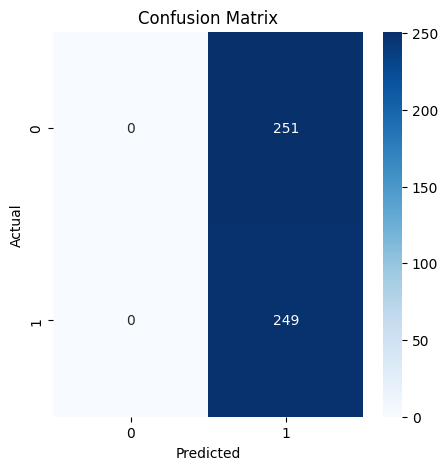

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Shape of output from dummy_cnn: (1000, 1600)


In [106]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate dummy data for demonstration
# Replace these with your actual data
num_samples = 1000
X_train = np.random.random((num_samples, 100, 5, 1))  # Example shape for input images
y_train = np.random.randint(2, size=(num_samples, 1))  # Binary labels (0 or 1)

X_test = np.random.random((num_samples // 2, 100, 5, 1))  # Example shape for input images
y_test = np.random.randint(2, size=(num_samples // 2, 1))  # Binary labels (0 or 1)

# Define the input layer
input_shape = (100, 5, 1)  # Adjust according to your data
inputs = Input(shape=input_shape)

# Define the CNN architecture
x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)

# Output layer for binary classification
outputs = Dense(1, activation='sigmoid')(x)  # Single output for binary classification

# Create the model
cnn_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test), shuffle=True)

# Predicting
y_pred = cnn_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion matrix
plt.figure(figsize=(5, 5))
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Create a dummy model to visualize the output from the Dense layer
dummy_cnn = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer(index=5).output)  # Access layer by index

# Predict using the dummy model
y_viz = dummy_cnn.predict(X_train)

# Print the shape of the output from the dummy model
print("Shape of output from dummy_cnn:", y_viz.shape)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classes in y_pred: {0.99999994: 496, 1.0: 4}


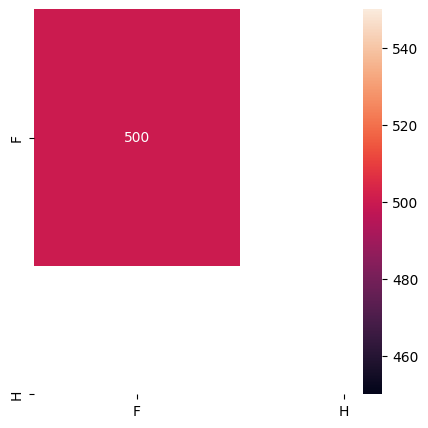

In [114]:
# prediction in test data  and confusion matrix
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)  # Get class indices
    y_pred = encoder.inverse_transform(y_pred)  # Convert to original labels
    return y_pred



y_pred=cnn_model.predict(X_test)


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(5,5))
cm = confusion_matrix(Y_test, Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d',xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

In [104]:
y_viz.shape

(1000, 1600)

Unique classes in y_train: [0 1]
Classes after inverse transformation: ['F']
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.182884
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.482925
[t-SNE] KL divergence after 300 iterations: 2.523183


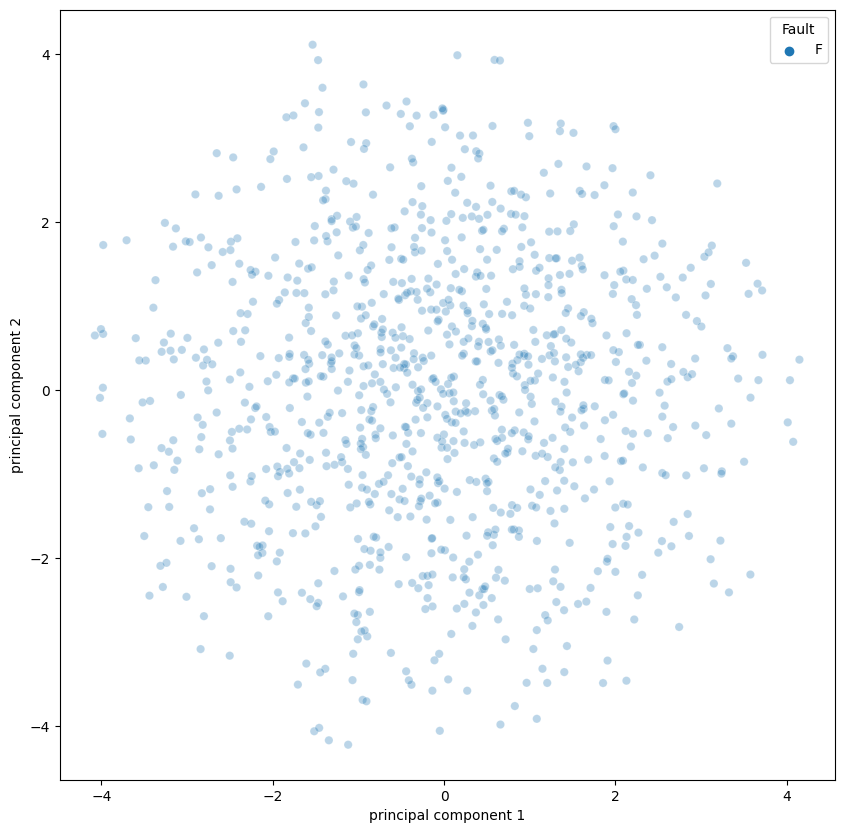

In [110]:
from sklearn.manifold import TSNE
print("Unique classes in y_train:", np.unique(y_train))
print("Classes after inverse transformation:", np.unique(inv_Transform_result(y_train)))
X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['principal component 1', 'principal component 2'])

tSNEdf['Fault']=inv_Transform_result(y_train)


# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=tSNEdf['principal component 1'],y=tSNEdf['principal component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.182884
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.702728
[t-SNE] KL divergence after 300 iterations: 2.698178


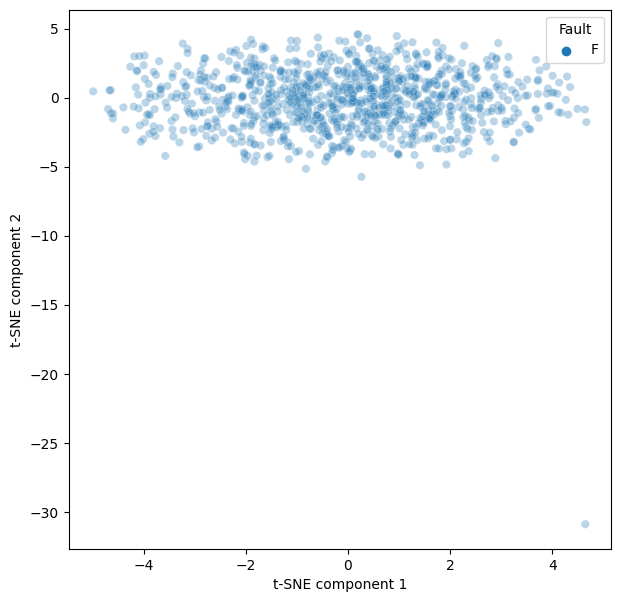

In [109]:
# Predict using the dummy CNN
y_viz = dummy_cnn.predict(X_train)

# Reshape the output if necessary
y_viz = y_viz.reshape(y_viz.shape[0], -1)  # Flatten the output

# Apply t-SNE
from sklearn.manifold import TSNE
X_t_sne = TSNE(n_components=2, learning_rate='auto', verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

# Create DataFrame for visualization
tSNEdf = pd.DataFrame(data=X_t_sne, columns=['t-SNE component 1', 't-SNE component 2'])
tSNEdf['Fault'] = inv_Transform_result(y_train)

# Plot the t-SNE results
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x=tSNEdf['t-SNE component 1'], y=tSNEdf['t-SNE component 2'], hue='Fault',
                data=tSNEdf, legend="full", alpha=0.3)
plt.show()